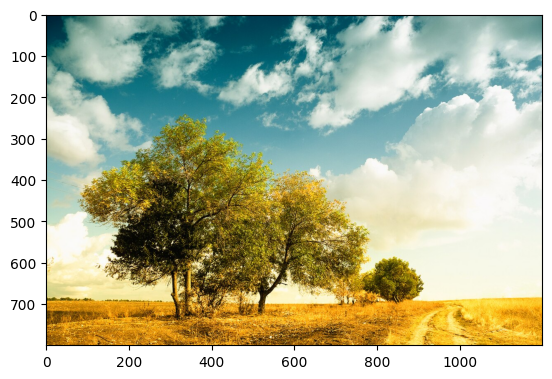

In [1]:
# Imports
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("scene.jpeg")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [2]:
# Normalizing Image color band
def normalizeIntensity(intensity, minI, maxI):
    # Input intensity
    iI = intensity

    # min max intensity of output
    minO = 0
    maxO = 255

    # Normalization
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)

    # Return output intensity after normalization
    return iO


In [6]:
# Task 1
def min_max_normalize(img, minI: int, maxI: int):
    # min max normalization
    return (cv.normalize(img,None,minI,maxI,cv.NORM_MINMAX)-minI)/(maxI-minI)

In [8]:
# Task 3
from skimage import exposure
def global_equalization(image):
    # Make the image grey
    gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

    # Equalize exposure using sci kit
    equalized_img = exposure.equalize_hist(gray_img)

    # Convert it back to color
    equalized_img = cv.cvtColor((equalized_img * 255).astype('uint8'), cv.COLOR_GRAY2RGB)
    return equalized_img


## Histogram Equalization
def local_equalization(image):
    # Make the image grey
    gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # Equalize exposure using sci kit
    equalized_img = exposure.equalize_adapthist(gray_img, clip_limit=0.03)

    # Convert it back to color
    equalized_img = cv.cvtColor((equalized_img * 255).astype('uint8'), cv.COLOR_GRAY2RGB)
    return equalized_img

(-0.5, 1199.5, 799.5, -0.5)

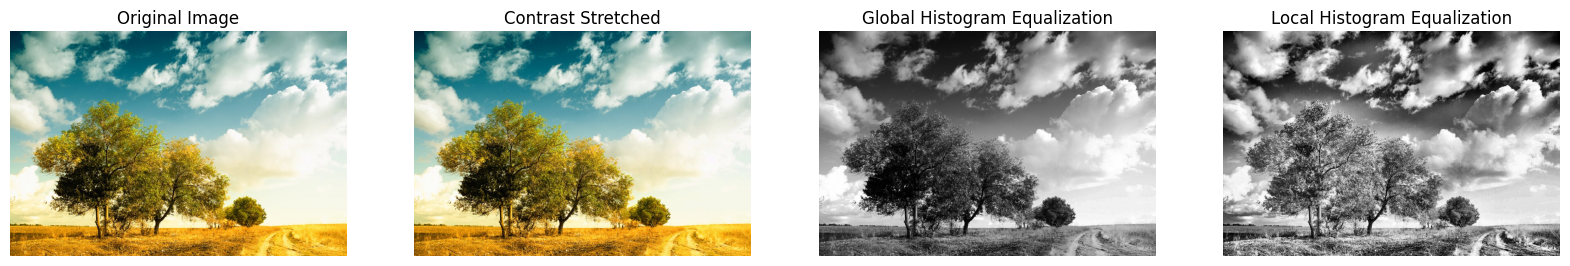

In [9]:
# Max, Min Intensity
minI = 100
maxI = 170

# Displaying all images
global_equalized_image = global_equalization(img)
local_equalized_image = local_equalization(img)
min_max_image = min_max_normalize(img, minI, maxI)


# Task d
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(min_max_image)
ax[1].set_title('Contrast Stretched')
ax[1].axis('off')
ax[2].imshow(global_equalized_image)
ax[2].set_title('Global Histogram Equalization')
ax[2].axis('off')
ax[3].imshow(local_equalized_image)
ax[3].set_title('Local Histogram Equalization')
ax[3].axis('off')